# Preparation & Data exploration

In [1]:
! pip install category_encoders --quiet

In [44]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

In [3]:
DIR_PATH = "/content/drive/MyDrive/Colab Notebooks/ML CCC"

RANDOM_STATE = 42

In [4]:
X_train = pd.read_csv(os.path.join(DIR_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(DIR_PATH, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(DIR_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(DIR_PATH, 'y_test.csv'))

In [5]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8252 non-null   int64  
 1   Own_car          8252 non-null   int64  
 2   Own_property     8252 non-null   int64  
 3   Work_phone       8252 non-null   int64  
 4   Phone            8252 non-null   int64  
 5   Email            8252 non-null   int64  
 6   Unemployed       8252 non-null   int64  
 7   Num_children     8252 non-null   int64  
 8   Num_family       8252 non-null   int64  
 9   Account_length   8252 non-null   int64  
 10  Total_income     8252 non-null   float64
 11  Age              8252 non-null   float64
 12  Years_employed   8252 non-null   float64
 13  Income_type      8252 non-null   object 
 14  Education_type   8252 non-null   object 
 15  Family_status    8252 non-null   object 
 16  Housing_type     8252 non-null   object 
 17  Occupation_typ

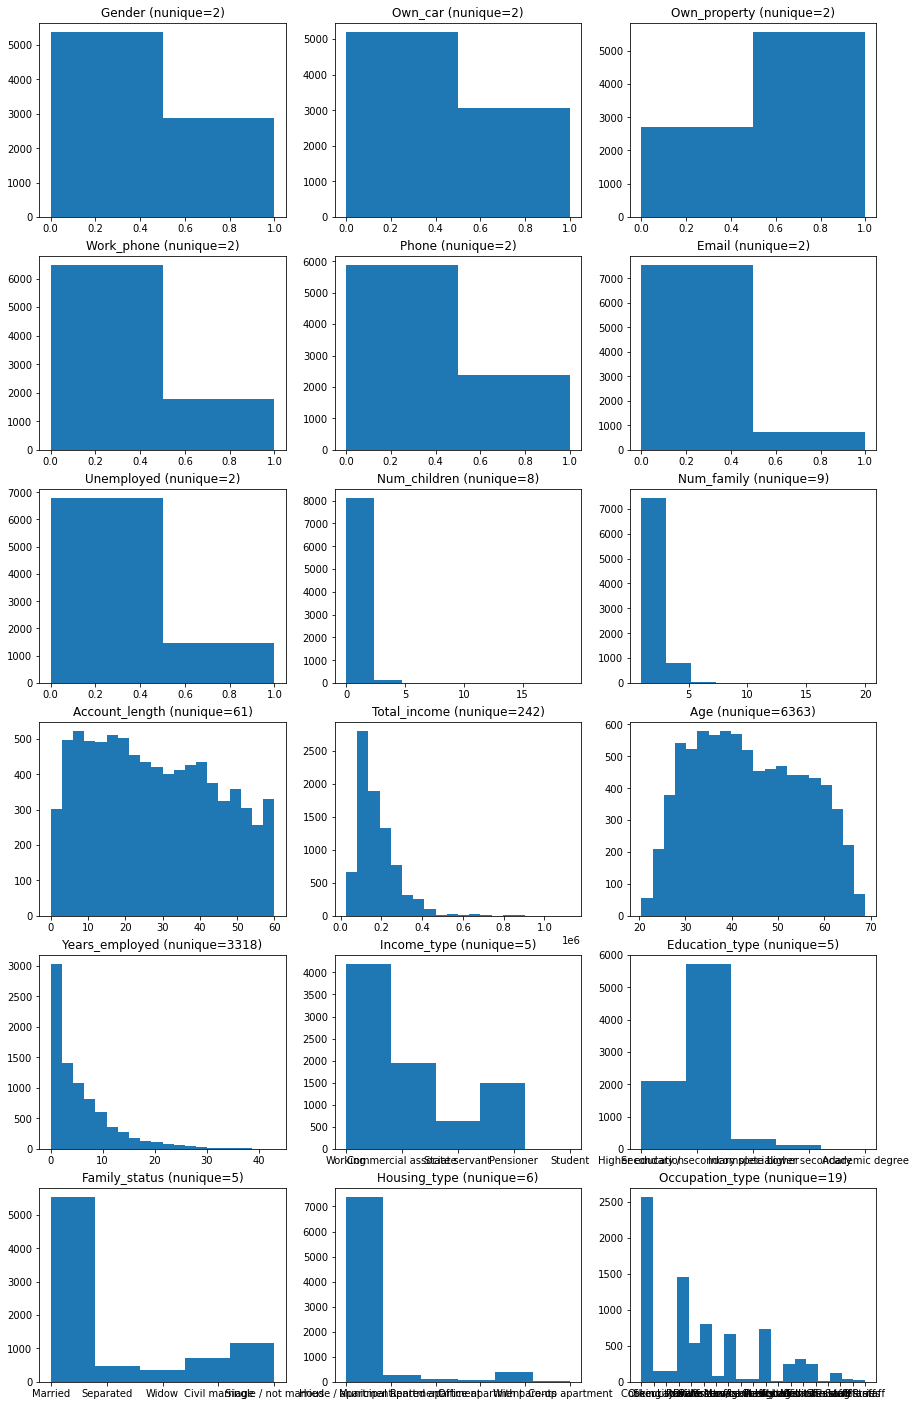

In [7]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [8]:
CATEGORICAL_COL_NAMES = ['Income_type', 'Education_type', 'Family_status',
                         'Housing_type', 'Occupation_type']
for col_name in CATEGORICAL_COL_NAMES:
    print(X_train[col_name].value_counts())
    print()

Working                 4193
Commercial associate    1951
Pensioner               1482
State servant            624
Student                    2
Name: Income_type, dtype: int64

Secondary / secondary special    5720
Higher education                 2113
Incomplete higher                 312
Lower secondary                   104
Academic degree                     3
Name: Education_type, dtype: int64

Married                 5544
Single / not married    1162
Civil marriage           709
Separated                487
Widow                    350
Name: Family_status, dtype: int64

House / apartment      7383
With parents            375
Municipal apartment     271
Rented apartment        125
Office apartment         67
Co-op apartment          31
Name: Housing_type, dtype: int64

Other                    2565
Laborers                 1452
Sales staff               804
Core staff                738
Managers                  666
Drivers                   532
High skill tech staff     319
Acco

In [9]:
X_train.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,0,0,1,0,0,0,0,0,2,59,202500.0,31.409269,1.631793,Working,Higher education,Married,House / apartment,Other
1,0,1,1,0,0,0,0,1,3,59,130500.0,38.746860,15.222763,Working,Secondary / secondary special,Married,House / apartment,Cooking staff
2,1,0,0,1,1,0,0,1,3,6,180000.0,39.428599,2.680411,Commercial associate,Secondary / secondary special,Married,House / apartment,Security staff
3,1,0,1,0,0,0,0,1,2,1,99000.0,40.208902,0.793993,Working,Secondary / secondary special,Separated,House / apartment,Laborers
4,0,0,1,0,0,0,0,3,5,42,179100.0,36.255365,5.002156,State servant,Secondary / secondary special,Married,House / apartment,Cooking staff


In [10]:
X_train.shape

(8252, 18)

(array([7162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

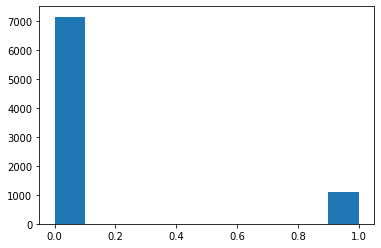

In [12]:
plt.hist(y_train)

# Ordinal encoding Education_type

In [19]:
X_train.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,0,0,1,0,0,0,0,0,2,59,202500.0,31.409269,1.631793,0.133556,3,0.127525,0.129893,0.123977
1,0,1,1,0,0,0,0,1,3,59,130500.0,38.746860,15.222763,0.133556,1,0.127525,0.129893,0.158940
2,1,0,0,1,1,0,0,1,3,6,180000.0,39.428599,2.680411,0.138903,1,0.127525,0.129893,0.162338
3,1,0,1,0,0,0,0,1,2,1,99000.0,40.208902,0.793993,0.133556,1,0.125257,0.129893,0.133609
4,0,0,1,0,0,0,0,3,5,42,179100.0,36.255365,5.002156,0.120192,1,0.127525,0.129893,0.158940


# TEST

In [20]:
X_test['Education_type'] = X_test['Education_type'].map(education_type_map)

for feature_name in [
        'Income_type', 'Family_status', 'Housing_type', 'Occupation_type']:
    mean_encoding_map = get_mean_encoding_map(feature_name)

    X_test[feature_name] = X_test[feature_name].map(mean_encoding_map)

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1457 non-null   int64  
 1   Own_car          1457 non-null   int64  
 2   Own_property     1457 non-null   int64  
 3   Work_phone       1457 non-null   int64  
 4   Phone            1457 non-null   int64  
 5   Email            1457 non-null   int64  
 6   Unemployed       1457 non-null   int64  
 7   Num_children     1457 non-null   int64  
 8   Num_family       1457 non-null   int64  
 9   Account_length   1457 non-null   int64  
 10  Total_income     1457 non-null   float64
 11  Age              1457 non-null   float64
 12  Years_employed   1457 non-null   float64
 13  Income_type      1457 non-null   float64
 14  Education_type   1457 non-null   int64  
 15  Family_status    1457 non-null   float64
 16  Housing_type     1457 non-null   float64
 17  Occupation_typ

In [22]:
bag = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)\
    .fit(X_train, y_train)

In [23]:
fbeta_score(y_test, bag.predict(X_test), beta=2)

0.0064516129032258064

In [24]:
bag.score(X_test, y_test)

0.8668496911461908

# TEST 2

In [25]:
smote = SMOTE(# sampling_strategy={0: 10000, 1:10000},
              random_state=RANDOM_STATE)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

(array([7162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

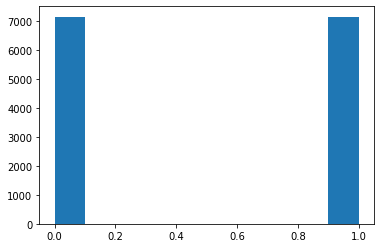

In [27]:
plt.hist(y_train_over)

In [38]:
bag = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)\
    .fit(X_train_over, y_train_over)

In [39]:
fbeta_score(y_test, bag.predict(X_test), beta=2)

0.05244755244755245

In [40]:
bag.score(X_test, y_test)

0.8208647906657516

# VIZ

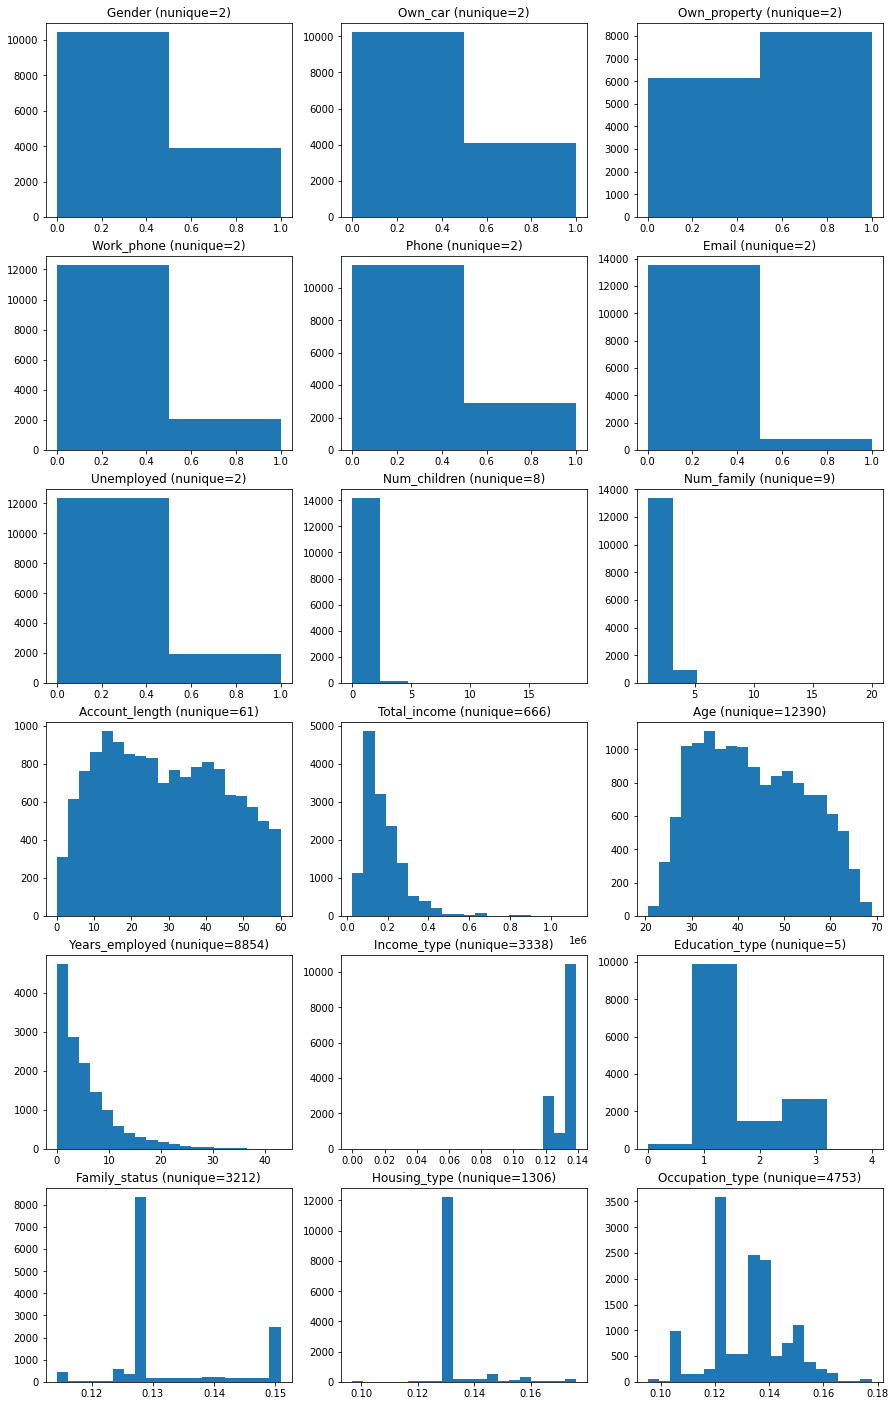

In [31]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train_over[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

# TEST RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=500,
                            random_state=RANDOM_STATE).fit(X_train, y_train)

In [60]:
fbeta_score(y_test, rf.predict(X_test), beta=2)

0.0

In [61]:
confusion_matrix(y_test, rf.predict(X_test))

array([[1263,    1],
       [ 193,    0]])

In [62]:
fbeta_score(y_train, rf.predict(X_train), beta=2)

1.0

In [63]:
rf.feature_importances_

array([0.0214989 , 0.0228655 , 0.02270625, 0.01612793, 0.02340629,
       0.01256241, 0.00331971, 0.02265703, 0.03440473, 0.15237324,
       0.1342222 , 0.19431133, 0.14865593, 0.03349358, 0.03038462,
       0.03508419, 0.02140147, 0.0705247 ])